In [1]:
using Plots
using DataFrames
gr()

Plots.GRBackend()

In [2]:
"""
concat_with_swapping(leftlist::Array{T,1}, rightlist::Array{T,1})::Array{T,1} where T<:Number

Concatnate leftlist and reversed rightlist into one list.
"""
function concat_with_swapping(leftlist::Array{T,1}, rightlist::Array{T,1})::Array{T,1} where T<:Number
  return vcat(leftlist, reverse(rightlist))
end

"""
sort_sub_list(list::Array{T, 1}, log=false::Boolean) where T<:Number

Sort one small list by comparing elements on left edge and right edge. 
Note: Require arg list to be processed by 'concat_with_swapping' method.
"""
function sort_sub_list(list::Array{T, 1}, log=false::Boolean) where T<:Number
  len = list |> length

  buf = len |> zeros
  left, right = 1, len
  
  for i in 1:len
    if log
      "left:$(list[left]), rihgt:$(list[right]), compare:$(list[left]<=list[right] ? 'l' : 'r')" |> println
    end
    if list[left] <= list[right]
      buf[i] = list[left]
      left += 1
    else
      buf[i] = list[right]
      right -= 1
    end
  end
  if log
    "before $list \nafter $buf" |> println
  end
  return buf
end

"""
merge_sort(arglist::Array{T, 1}, log=false::Bool)::Array{T,1} where T<:Number

sort a list by merge sort
"""
function merge_sort(arglist::Array{T, 1}, log=false::Bool)::Array{T,1} where T<:Number
  len = arglist |> length
  if len == 1
    return arglist
  end
  
  mean = div(len, 2)
  
  left_sub = arglist[1:mean] |> merge_sort
  right_sub = arglist[mean+1:len] |> merge_sort
  
  sublist = concat_with_swapping(left_sub, right_sub)
  return sort_sub_list(sublist, log)
end
  

merge_sort

In [3]:
# Defied in previous Cell.
# ?concat_with_swapping
# ?sort_sub_list
# ?merge_sort

In [4]:
N = 1000

list = rand(N) .|> x->round(x, digits=2)

"Data initialized. length: $(length(list)), max: $(maximum(list)), min: $(minimum(list))" |> println

mergesort = merge_sort
@time sorted_list = mergesort(list)

sort(list) == sorted_list ? "Sort success" : "Sort failure"

Data initialized. length: 1000, max: 1.0, min: 0.0
  0.105185 seconds (352.27 k allocations: 18.158 MiB)


"Sort success"

In [5]:
df = DataFrame(A = list, B = sorted_list)[!, :A]

1000-element Array{Float64,1}:
 1.0 
 0.2 
 1.0 
 0.43
 0.99
 0.95
 0.47
 0.37
 0.9 
 0.47
 0.4 
 0.11
 0.59
 ⋮   
 0.8 
 0.62
 0.93
 0.24
 0.98
 0.46
 0.83
 0.61
 0.54
 0.12
 0.27
 0.75

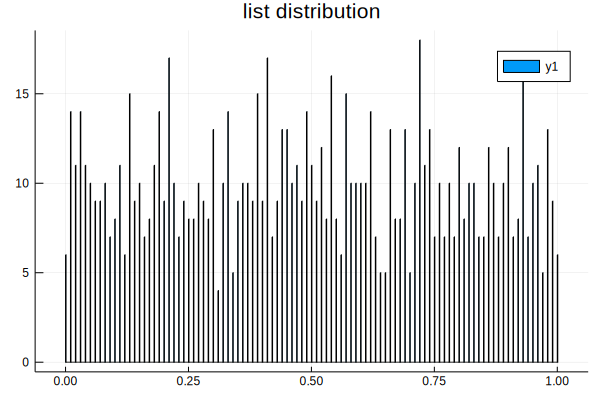

In [6]:
histogram(list, bins=N, title="list distribution")

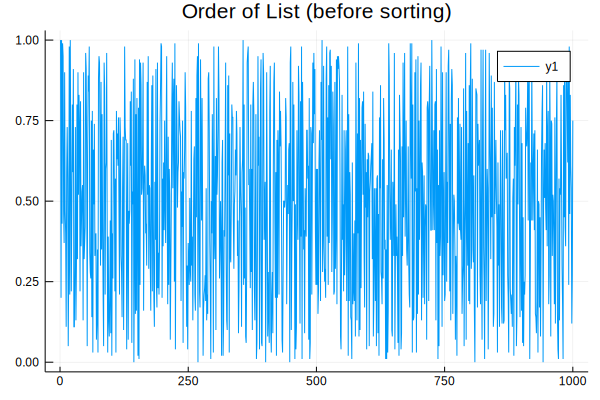

In [7]:
plot(list, title="Order of List (before sorting)")

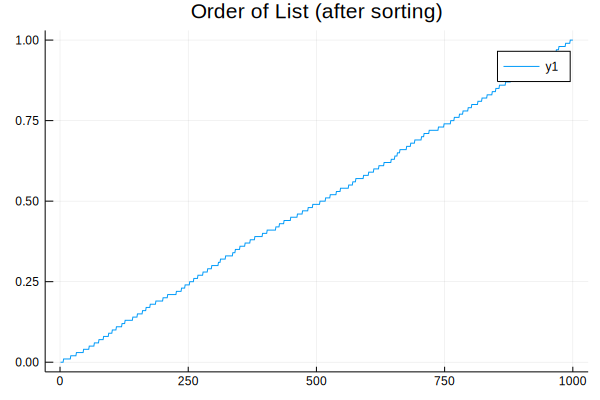

In [8]:
plot(sorted_list, title="Order of List (after sorting)")